In [1]:
!pip install --upgrade praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.1 MB/s eta 0:00:00


In [3]:
!pip install requests_oauthlib

In [4]:
import praw

# Reddit App Credentials
client_id = 'PLlYINNMHpui_Fc44xA4YA'  # Replace with your Client ID
client_secret = '8ckA0IJZiUPsQr76yQJx-AzqqQa7Bw'  # Replace with your Client Secret
redirect_uri = 'http://localhost'  # Must match the Redirect URI in Reddit Developer Portal
user_agent = 'Stock_Sentiment/1.0 by Deeshanshi_25'  # Replace with your User Agent

# Initialize Reddit Instance
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,
    redirect_uri=redirect_uri
)

# Generate Authorization URL
auth_url = reddit.auth.url(scopes=['identity'], state='random_state')
print(f"Go to the following URL to authorize:\n{auth_url}")

# Enter the authorization code after visiting the URL
code = input("Enter the code you received here: ")

# Fetch the Access Token
refresh_token = reddit.auth.authorize(code)
print(f"Authentication successful! Refresh Token: {refresh_token}")

# Test Authentication
print(f"Authenticated as: {reddit.user.me()}")


Go to the following URL to authorize:
https://www.reddit.com/api/v1/authorize?client_id=PLlYINNMHpui_Fc44xA4YA&duration=permanent&redirect_uri=http%3A%2F%2Flocalhost&response_type=code&scope=identity&state=random_state
Enter the code you received here: todQIznOI7Y2awHo46in6jzRiTbt0A


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Authentication successful! Refresh Token: 117664545494080-E0yTBIad6awEyP1ZfxPUi3lxs-7_PA
Authenticated as: Deeshanshi_25


In [5]:
import praw

# Reddit App Credentials
client_id = 'PLlYINNMHpui_Fc44xA4YA'  # Replace with your Client ID
client_secret = '8ckA0IJZiUPsQr76yQJx-AzqqQa7Bw'  # Replace with your Client Secret
redirect_uri = 'http://localhost'  # Must match the Redirect URI in Reddit Developer Portal
user_agent = 'Stock_Sentiment/1.0 by Deeshanshi_25'  # Replace with your User Agent

# Initialize Reddit Instance
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,
    redirect_uri=redirect_uri
)

# Generate Authorization URL with 'read' scope
auth_url = reddit.auth.url(scopes=['identity', 'read'], state='random_state')
print(f"Go to the following URL to authorize:\n{auth_url}")

# Enter the authorization code after visiting the URL
code = input("Enter the code you received here: ")

# Fetch the Access Token
refresh_token = reddit.auth.authorize(code)
print(f"Authentication successful! Refresh Token: {refresh_token}")

# Test Access to Subreddit Data
subreddit = reddit.subreddit("stocks")
for post in subreddit.hot(limit=10):
    print(f"Title: {post.title}, Score: {post.score}")


Go to the following URL to authorize:
https://www.reddit.com/api/v1/authorize?client_id=PLlYINNMHpui_Fc44xA4YA&duration=permanent&redirect_uri=http%3A%2F%2Flocalhost&response_type=code&scope=identity+read&state=random_state
Enter the code you received here: xGyt4tl_3Ie_W3o32fkJTLfax_oZPw


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Authentication successful! Refresh Token: 117664545494080-uQPq_icsmtlDqmRq_zkwYAkBG7bcgg
Title: Rate My Portfolio - r/Stocks Quarterly Thread December 2024, Score: 12
Title: r/Stocks Daily Discussion Wednesday - Dec 04, 2024, Score: 5
Title: UnitedHealthcare CEO fatally shot, Score: 291
Title: Amazon sued by DC attorney general for allegedly excluding neighborhoods from Prime delivery, Score: 76
Title: Whats going on with the french index?, Score: 29
Title: Do you guys believe we are in the beginning of “the great melt up” or that a recession is coming in the somewhat near future ?, Score: 17
Title: GM expects more than $5 billion impact from China restructuring, including plant closures, Score: 16
Title: Name a large-cap stock and its small-cap competitor , Score: 115
Title: These are the stocks on my watchlist (12/4), Score: 7
Title: Tesla CEO Elon Musk loses bid to get $56 billion pay package reinstated, Score: 5312


In [7]:
import pandas as pd

# Define subreddit and collect posts
subreddit = reddit.subreddit("stocks")  # Replace with subreddit of choice
posts = []

for post in subreddit.hot(limit=100):
    posts.append({
        "Title": post.title,
        "Score": post.score,
        "Comments": post.num_comments,
        "Created": post.created_utc,
        "URL": post.url
    })

# Save the data to a DataFrame
df = pd.DataFrame(posts)

# Save to CSV for further analysis
df.to_csv("reddit_posts.csv", index=False)
print("Scraped posts saved to reddit_posts.csv!")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraped posts saved to reddit_posts.csv!


In [8]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("reddit_posts.csv")

# Inspect the first few rows
print(df.head())


                                               Title  Score  Comments  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...     11       108   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...      6        44   
2                  UnitedHealthcare CEO fatally shot    296       226   
3  Amazon sued by DC attorney general for alleged...     77        50   
4              Whats going on with the french index?     32        22   

        Created                                                URL  
0  1.733047e+09  https://www.reddit.com/r/stocks/comments/1h403...  
1  1.733308e+09  https://www.reddit.com/r/stocks/comments/1h6d0...  
2  1.733322e+09  https://www.reddit.com/r/stocks/comments/1h6h6...  
3  1.733320e+09  https://www.reddit.com/r/stocks/comments/1h6gi...  
4  1.733317e+09  https://www.reddit.com/r/stocks/comments/1h6ff...  


In [9]:
import pandas as pd

# Load the previously saved CSV file
df = pd.read_csv('reddit_posts.csv')

# Check the first few rows
print(df.head())

                                               Title  Score  Comments  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...     11       108   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...      6        44   
2                  UnitedHealthcare CEO fatally shot    296       226   
3  Amazon sued by DC attorney general for alleged...     77        50   
4              Whats going on with the french index?     32        22   

        Created                                                URL  
0  1.733047e+09  https://www.reddit.com/r/stocks/comments/1h403...  
1  1.733308e+09  https://www.reddit.com/r/stocks/comments/1h6d0...  
2  1.733322e+09  https://www.reddit.com/r/stocks/comments/1h6h6...  
3  1.733320e+09  https://www.reddit.com/r/stocks/comments/1h6gi...  
4  1.733317e+09  https://www.reddit.com/r/stocks/comments/1h6ff...  


In [10]:
import re
import pandas as pd

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters (e.g., punctuation, numbers)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply cleaning function to the 'Title' column
df['Cleaned_Title'] = df['Title'].apply(clean_text)

# Display the cleaned data
print(df[['Title', 'Cleaned_Title']].head())


                                               Title  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...   
2                  UnitedHealthcare CEO fatally shot   
3  Amazon sued by DC attorney general for alleged...   
4              Whats going on with the french index?   

                                       Cleaned_Title  
0  rate my portfolio  rstocks quarterly thread de...  
1          rstocks daily discussion wednesday  dec    
2                  unitedhealthcare ceo fatally shot  
3  amazon sued by dc attorney general for alleged...  
4               whats going on with the french index  


In [11]:
!pip install nltk


In [12]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    text_words = text.split()
    text_words = [word for word in text_words if word not in stop_words]
    return " ".join(text_words)

# Apply remove stopwords function
df['Cleaned_Title_No_Stopwords'] = df['Cleaned_Title'].apply(remove_stopwords)

# Display the cleaned data without stop words
print(df[['Title', 'Cleaned_Title_No_Stopwords']].head())


                                               Title  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...   
2                  UnitedHealthcare CEO fatally shot   
3  Amazon sued by DC attorney general for alleged...   
4              Whats going on with the french index?   

                          Cleaned_Title_No_Stopwords  
0   rate portfolio rstocks quarterly thread december  
1             rstocks daily discussion wednesday dec  
2                  unitedhealthcare ceo fatally shot  
3  amazon sued dc attorney general allegedly excl...  
4                           whats going french index  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the cleaned titles
df['Sentiment_Score'] = df['Cleaned_Title_No_Stopwords'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Categorize sentiment based on the score
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Display the DataFrame with sentiment scores and labels
print(df[['Title', 'Sentiment_Score', 'Sentiment_Label']].head())


                                               Title  Sentiment_Score  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...           0.0000   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...           0.0000   
2                  UnitedHealthcare CEO fatally shot          -0.6369   
3  Amazon sued by DC attorney general for alleged...           0.1779   
4              Whats going on with the french index?           0.0000   

  Sentiment_Label  
0         Neutral  
1         Neutral  
2        Negative  
3        Positive  
4         Neutral  


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Reapply sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')


In [ ]:
df.to_csv('reddit_posts_with_sentiment.csv', index=False)
print("File saved as reddit_posts_with_sentiment.csv")


File saved as reddit_posts_with_sentiment.csv


In [ ]:
from google.colab import files
files.download('reddit_posts_with_sentiment.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

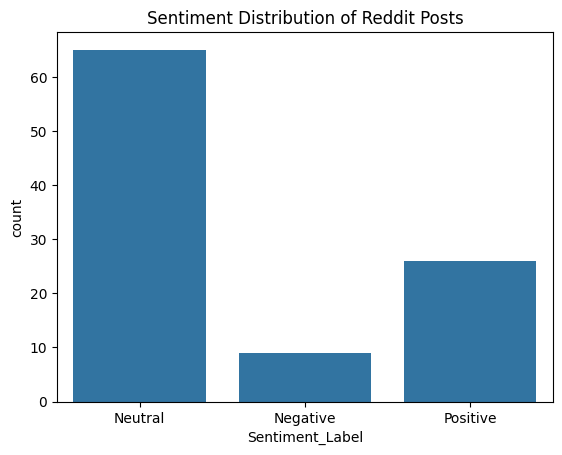

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.countplot(x='Sentiment_Label', data=df)
plt.title("Sentiment Distribution of Reddit Posts")
plt.show()


In [ ]:
# Save the data with sentiment analysis results
df.to_csv("reddit_posts_with_sentiment_analysis.csv", index=False)
print("Sentiment analysis results saved to reddit_posts_with_sentiment_analysis.csv")


Sentiment analysis results saved to reddit_posts_with_sentiment_analysis.csv


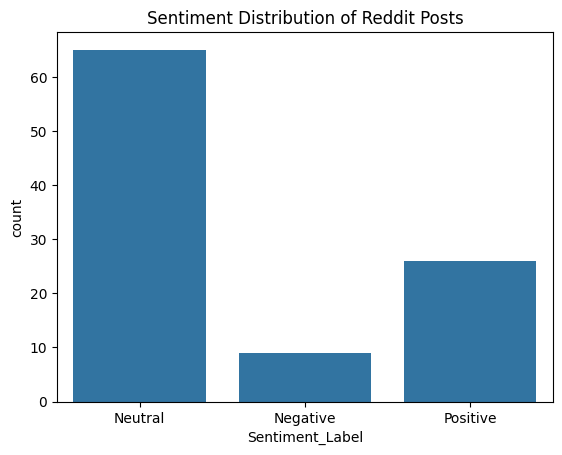

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.countplot(x='Sentiment_Label', data=df)
plt.title("Sentiment Distribution of Reddit Posts")
plt.show()


In [18]:
print(df.columns)


Index(['Title', 'Score', 'Comments', 'Created', 'URL', 'Cleaned_Title',
       'Cleaned_Title_No_Stopwords', 'Sentiment_Score', 'Sentiment_Label'],
      dtype='object')


In [19]:
# Convert 'Created' column (Unix timestamp) to datetime
df['Created_Date'] = pd.to_datetime(df['Created'], unit='s')

# Check if the conversion worked
print(df[['Created', 'Created_Date']].head())


        Created        Created_Date
0  1.733047e+09 2024-12-01 10:00:22
1  1.733308e+09 2024-12-04 10:30:08
2  1.733322e+09 2024-12-04 14:23:42
3  1.733320e+09 2024-12-04 13:53:24
4  1.733317e+09 2024-12-04 13:01:35


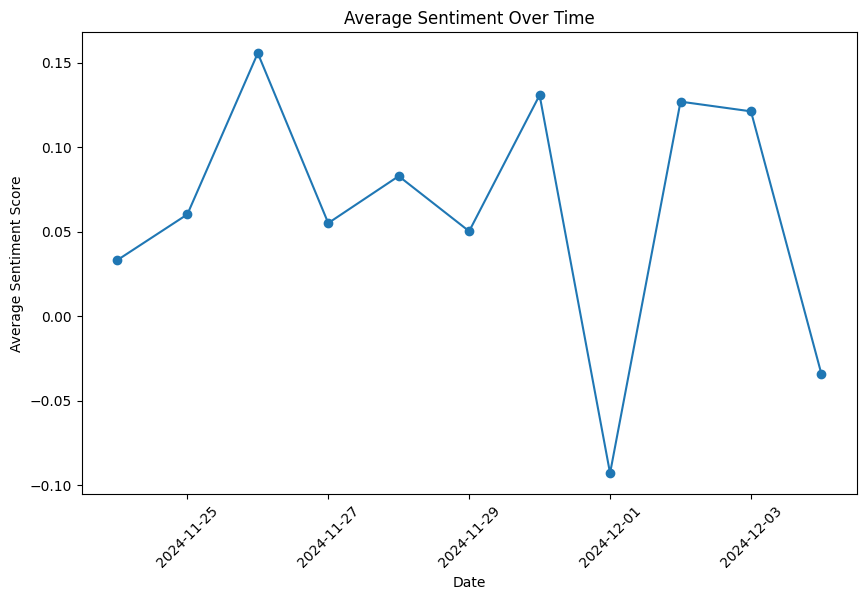

In [21]:
# Group by Date and calculated average sentiment score per day
df['Date'] = df['Created_Date'].dt.date  # Ensures the date column is used
sentiment_by_date = df.groupby('Date')['Sentiment_Score'].mean().reset_index()

# Plot sentiment trend over time
plt.figure(figsize=(10,6))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['Sentiment_Score'], marker='o')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


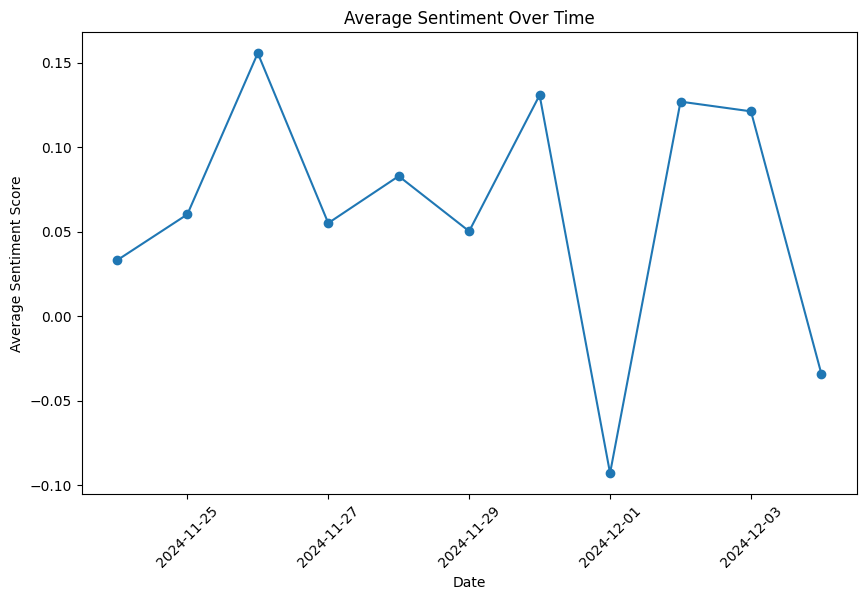

In [22]:
# Group by Date and calculated average sentiment score per day
df['Date'] = df['Created_Date'].dt.date  # Ensures the date column is used
sentiment_by_date = df.groupby('Date')['Sentiment_Score'].mean().reset_index()

# Plot sentiment trend over time
plt.figure(figsize=(10,6))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['Sentiment_Score'], marker='o')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.savefig('sentiment_distribution.png')  # Save the bar chart
plt.savefig('sentiment_over_time.png')  # Save the line chart


<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files
files.download('sentiment_distribution.png')
files.download('sentiment_over_time.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Save the data with sentiment analysis results
df.to_csv("reddit_posts_with_sentiment_analysis.csv", index=False)
print("Sentiment analysis results saved to reddit_posts_with_sentiment_analysis.csv")


Sentiment analysis results saved to reddit_posts_with_sentiment_analysis.csv


In [23]:
import yfinance as yf

# Get Tesla stock price data (for a specific date range)
tesla_data = yf.download('TSLA', start='2024-01-01', end='2024-12-31')

# Display the stock price data
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           TSLA        TSLA        TSLA        TSLA   
Date                                                                        
2024-01-02 00:00:00+00:00  248.419998  248.419998  251.250000  244.410004   
2024-01-03 00:00:00+00:00  238.449997  238.449997  245.679993  236.320007   
2024-01-04 00:00:00+00:00  237.929993  237.929993  242.699997  237.729996   
2024-01-05 00:00:00+00:00  237.490005  237.490005  240.119995  234.899994   
2024-01-08 00:00:00+00:00  240.449997  240.449997  241.250000  235.300003   

Price                            Open     Volume  
Ticker                           TSLA       TSLA  
Date                                              
2024-01-02 00:00:00+00:00  250.080002  104654200  
2024-01-03 00:00:00+00:00  244.979996  121082600  
2024-01-04 00:00:00+00:00  239.250000  102629300  
2024-01-05 00:00:00+00:00  236.860001   92379400  
2024-01-08 00:00:00+00:00 

In [57]:
# Fetch stock price data (e.g., Tesla) for the same period
stock_data = yf.download('TSLA', start='2024-01-01', end='2024-12-31')
stock_data['Price_Change'] = stock_data['Close'].diff()  # Daily price change
stock_data['Movement'] = stock_data['Price_Change'].apply(lambda x: 'Up' if x > 0 else 'Down')  # Label movements
stock_data = stock_data[['Close', 'Movement']]  # Keep relevant columns

# Display stock price data with labels
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price                           Close Movement
Ticker                           TSLA         
Date                                          
2024-01-02 00:00:00+00:00  248.419998     Down
2024-01-03 00:00:00+00:00  238.449997     Down
2024-01-04 00:00:00+00:00  237.929993     Down
2024-01-05 00:00:00+00:00  237.490005     Down
2024-01-08 00:00:00+00:00  240.449997       Up


Sentiment DataFrame Head:
                                                Title  Score  Comments  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...     11       108   
1  r/Stocks Daily Discussion Wednesday - Dec 04, ...      6        44   
2                  UnitedHealthcare CEO fatally shot    296       226   
3  Amazon sued by DC attorney general for alleged...     77        50   
4              Whats going on with the french index?     32        22   

        Created                                                URL  \
0  1.733047e+09  https://www.reddit.com/r/stocks/comments/1h403...   
1  1.733308e+09  https://www.reddit.com/r/stocks/comments/1h6d0...   
2  1.733322e+09  https://www.reddit.com/r/stocks/comments/1h6h6...   
3  1.733320e+09  https://www.reddit.com/r/stocks/comments/1h6gi...   
4  1.733317e+09  https://www.reddit.com/r/stocks/comments/1h6ff...   

                                       Cleaned_Title  \
0  rate my portfolio  rstocks quarterly thread de...   
1

[*********************100%***********************]  1 of 1 completed


Stock DataFrame Head:
          Date   Adj Close       Close        High         Low        Open  \
0  2024-01-02  248.419998  248.419998  251.250000  244.410004  250.080002   
1  2024-01-03  238.449997  238.449997  245.679993  236.320007  244.979996   
2  2024-01-04  237.929993  237.929993  242.699997  237.729996  239.250000   
3  2024-01-05  237.490005  237.490005  240.119995  234.899994  236.860001   
4  2024-01-08  240.449997  240.449997  241.250000  235.300003  236.139999   

      Volume  
0  104654200  
1  121082600  
2  102629300  
3   92379400  
4   85166600  
Stock DataFrame Columns:
 Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Merged DataFrame Head:
                                                Title  Score  Comments  \
0  r/Stocks Daily Discussion Wednesday - Dec 04, ...      6        44   
1                  UnitedHealthcare CEO fatally shot    296       226   
2  Amazon sued by DC attorney general for alleged...     77        5

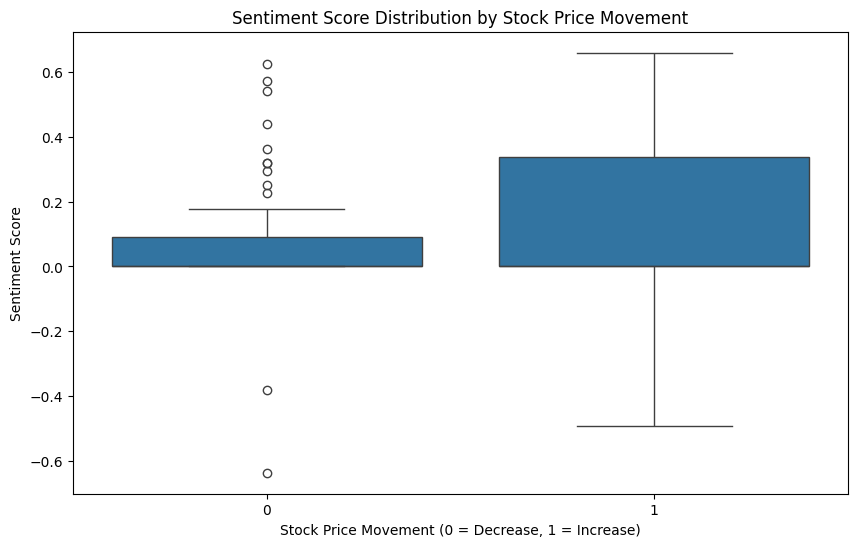

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import yfinance as yf

# Step 1: Load and Merge Sentiment and Stock Data
# Loading the sentiment data
sentiment_df = pd.read_csv("reddit_posts_with_sentiment_analysis.csv")
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date  # Convert to plain date format

# Debugging: Print sentiment_df columns and check 'Date'
print("Sentiment DataFrame Head:\n", sentiment_df.head())
print("Sentiment DataFrame Columns:\n", sentiment_df.columns)

# Loading the stock data (e.g., Tesla)
stock_df = yf.download('TSLA', start='2024-01-01', end='2024-12-31')
stock_df.reset_index(inplace=True)  # Flatten the index

# Fixing MultiIndex column issue by renaming columns
stock_df.columns = [col[0] if isinstance(col, tuple) else col for col in stock_df.columns]
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date  # Ensure 'Date' is a plain date column

# Debugging: Print stock_df columns and check 'Date'
print("Stock DataFrame Head:\n", stock_df.head())
print("Stock DataFrame Columns:\n", stock_df.columns)

# Merging sentiment data with stock data on the 'Date' column
merged_df = pd.merge(sentiment_df, stock_df, on='Date', how='inner')  # Inner join ensures matching dates

# Debugging: Print merged_df to ensure correct merging
print("Merged DataFrame Head:\n", merged_df.head())
print("Merged DataFrame Columns:\n", merged_df.columns)

# Step 2: Feature Engineering
# Creating a target variable (e.g., 1 for stock price increase, 0 for decrease or no change)
merged_df['Price_Change'] = (merged_df['Close'] > merged_df['Open']).astype(int)

# Using sentiment score as a feature
features = ['Sentiment_Score']
X = merged_df[features]
y = merged_df['Price_Change']

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
})
print("Feature Importance:")
print(feature_importance)

# Plotting sentiment vs stock price movement
def plot_sentiment_vs_movement():
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Price_Change', y='Sentiment_Score', data=merged_df)
    plt.title('Sentiment Score Distribution by Stock Price Movement')
    plt.xlabel('Stock Price Movement (0 = Decrease, 1 = Increase)')
    plt.ylabel('Sentiment Score')
    plt.show()

plot_sentiment_vs_movement()


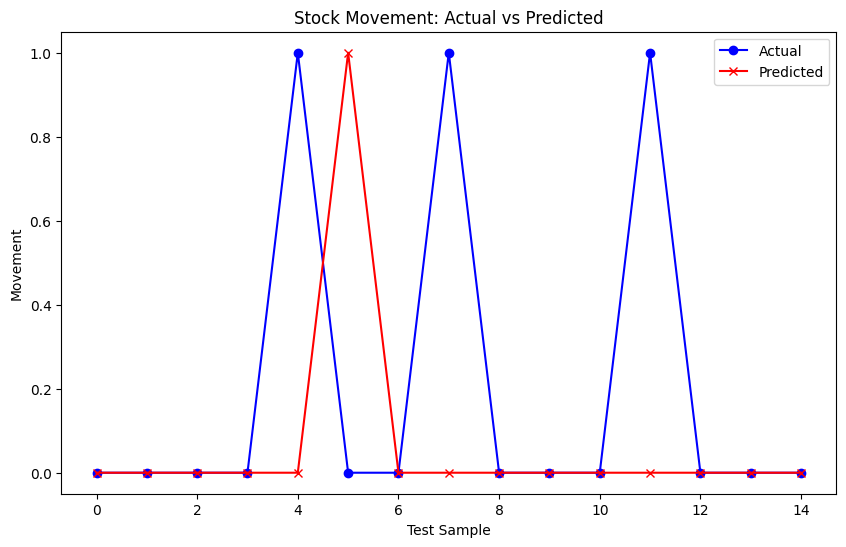

In [67]:
import matplotlib.pyplot as plt

# Sample visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:20], label='Actual', marker='o', color='blue')
plt.plot(y_pred[:20], label='Predicted', marker='x', color='red')
plt.title('Stock Movement: Actual vs Predicted')
plt.xlabel('Test Sample')
plt.ylabel('Movement')
plt.legend()
plt.show()
